In [1]:
from assignment4_helpers import *

/var/folders/0n/bb4_kwsn3n5c5_7n_mgl2n540000gn/T/ipykernel_33054/24708549.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/elias/miniconda3/envs/mmuq/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


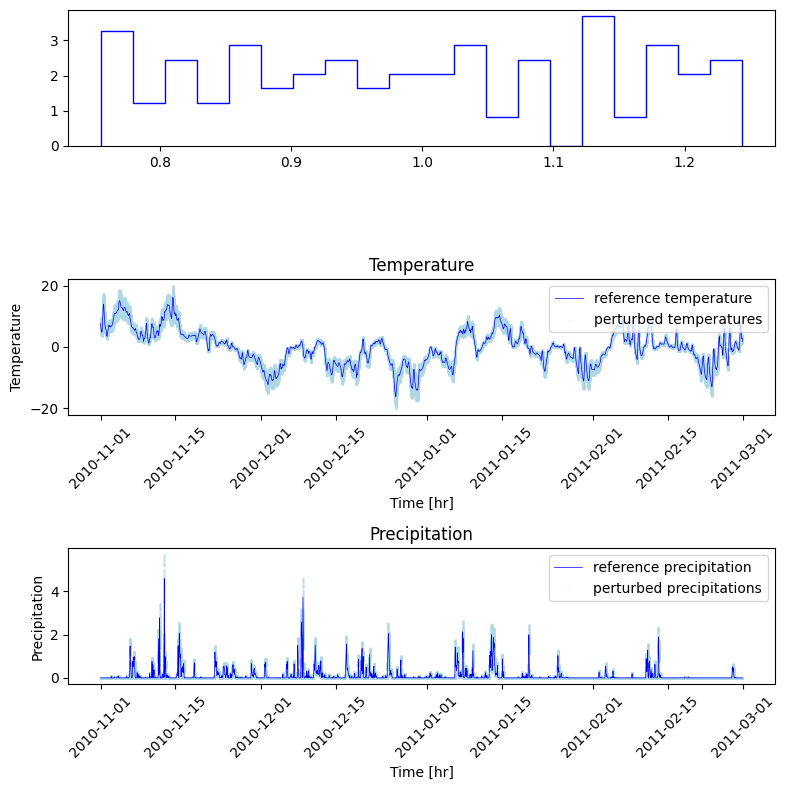

In [2]:
# Perturb input tem and ppt

num = 100 #! later 2000

ref_tem, tems, ref_ppt, ppts, perturbation_factors = perturb_inputs(num=num)
x_labels = pd.read_csv(r'time_series___24163005.csv', sep=';', index_col=0)
x_labels.index = pd.to_datetime(x_labels.index, format='%Y-%m-%d-%H')

fig = plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.hist(perturbation_factors, bins=20, density=True, histtype='step', color='blue', label='perturbation factors')


plt.subplot(3, 1, 2)
plt.plot(x_labels.index, ref_tem, label="reference temperature", color='blue', linewidth=0.5)
for i in range(tems.shape[0]):
    if i == 0:
        plt.scatter(x_labels.index, tems[i], alpha=0.1, color='lightblue', s=1, label="perturbed temperatures")
    else:
        plt.scatter(x_labels.index, tems[i], alpha=0.1, color='lightblue', s=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Temperature')
plt.title("Temperature")


plt.subplot(3, 1, 3)
plt.plot(x_labels.index, ref_ppt, label="reference precipitation", color='blue', linewidth=0.5)
for i in range(ppts.shape[0]):
    if i == 0:
        plt.scatter(x_labels.index, ppts[i], alpha=0.1, color='lightblue', s=1, label="perturbed precipitations")
    plt.scatter(x_labels.index, ppts[i], alpha=0.1, color='lightblue', s=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Precipitation')
plt.title("Precipitation")

plt.tight_layout()
plt.show()

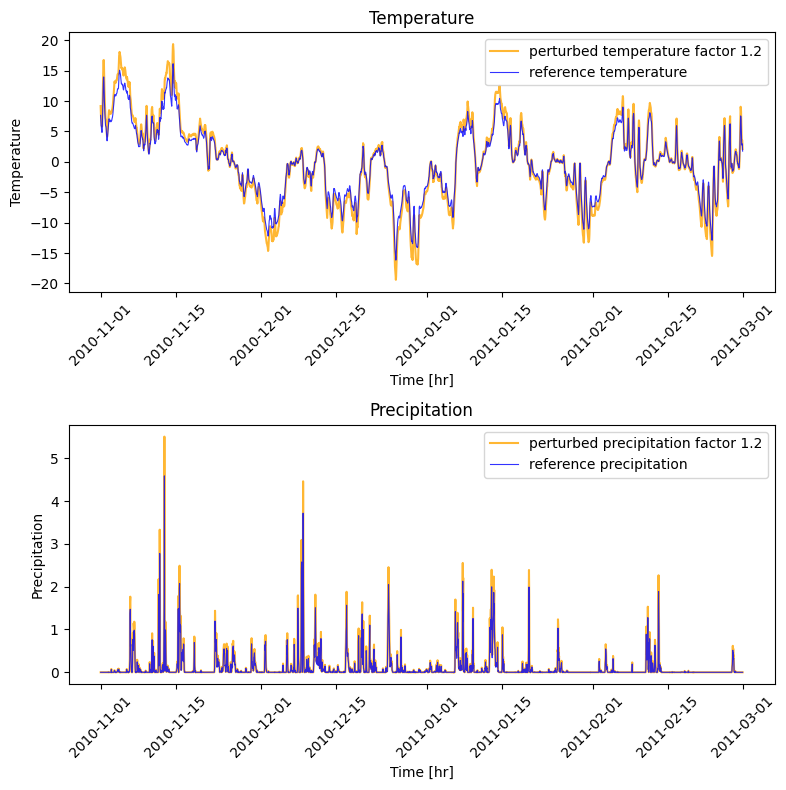

In [31]:
# Show one single perturbation for tem and ppt
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(x_labels.index, ref_tem * 1.2, label="perturbed temperature factor 1.2", color='orange', alpha=0.8)
plt.plot(x_labels.index, ref_tem, label="reference temperature", color='blue', alpha=0.8, linewidth=0.8)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Temperature')
plt.title("Temperature")

plt.subplot(2, 1, 2)
plt.plot(x_labels.index, ref_ppt * 1.2, label="perturbed precipitation factor 1.2", color='orange', alpha=0.8)
plt.plot(x_labels.index, ref_ppt, label="reference precipitation", color='blue', alpha=0.8, linewidth=0.8)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Precipitation')
plt.title("Precipitation")

plt.tight_layout()
plt.show()

In [ ]:
# run model with perturbed inputs and recalibrate each time
recalib_params, recalib_obj_values, ref_params, ref_obj_value = run_model_with_perturbed_inputs(tems, ppts, ref_tem, ref_ppt)

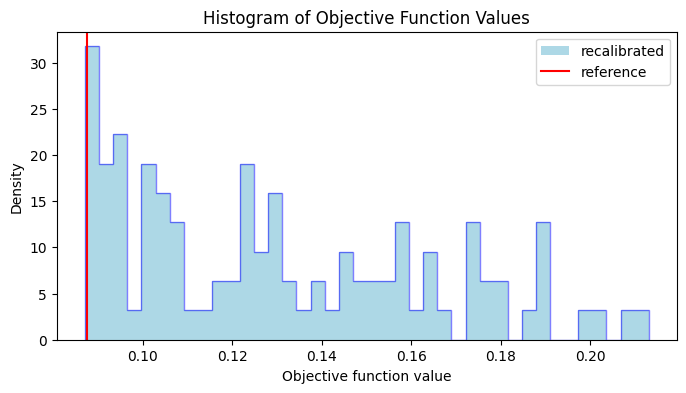

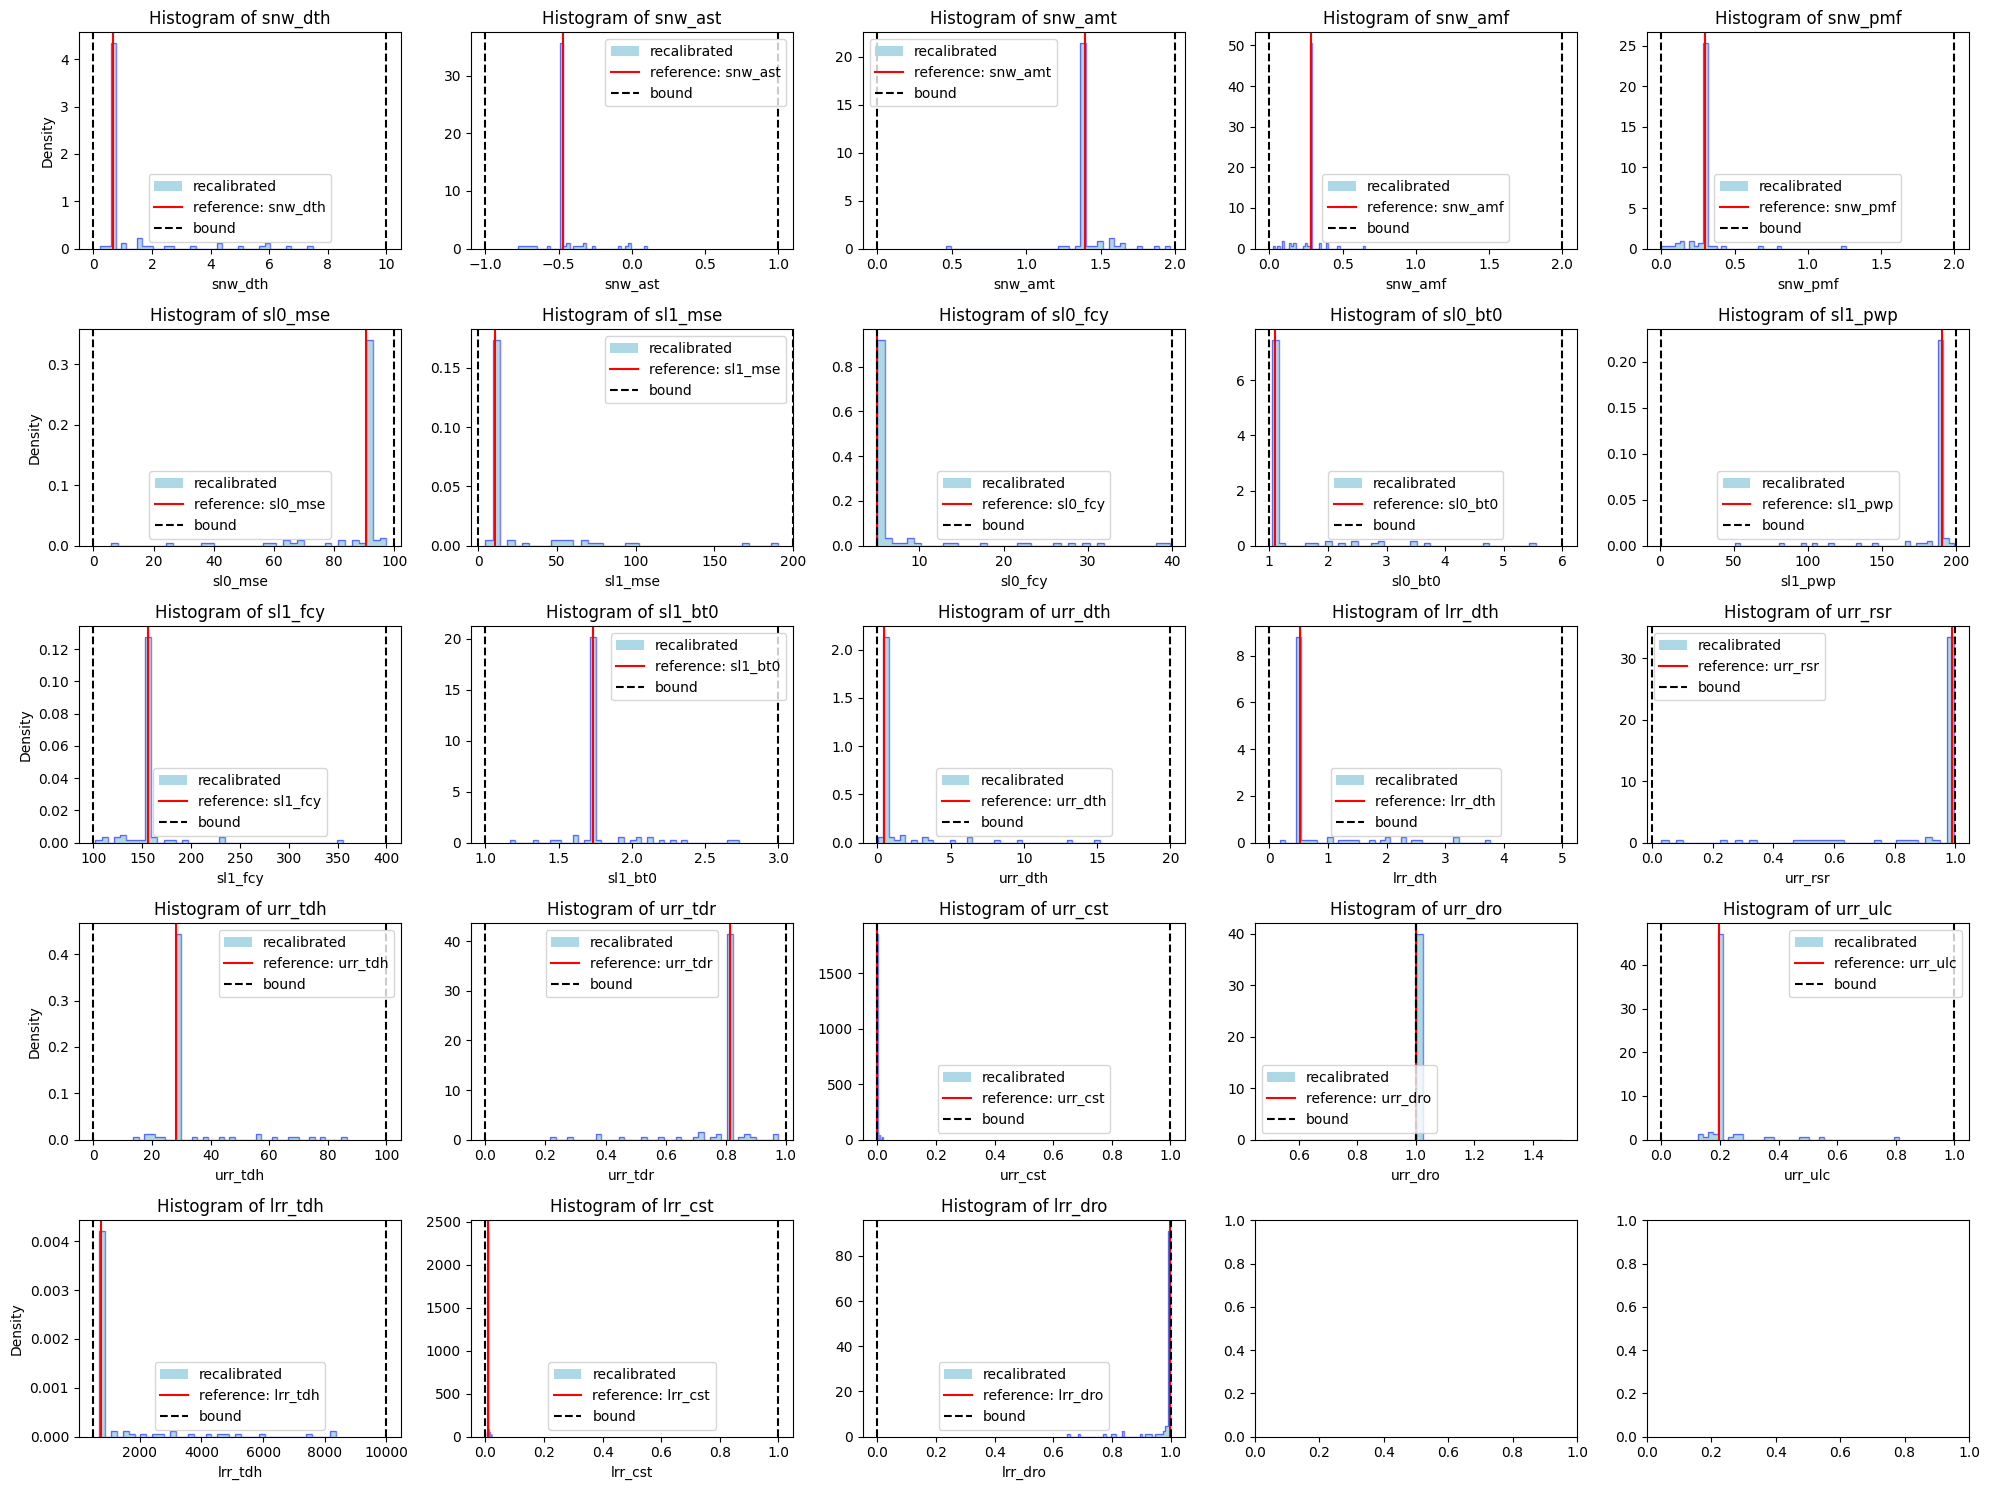

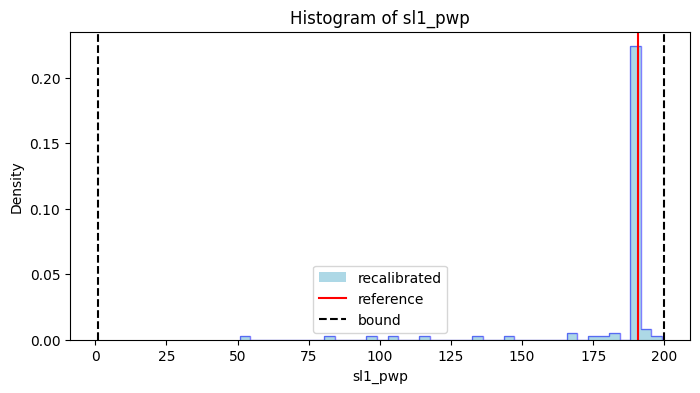

In [24]:
import seaborn as sns

# Plot Histogram of objective function values
fig = plt.figure(figsize=(8, 4))
# sns.kdeplot(recalib_obj_values, color='blue', label='recalibrated')
plt.hist(recalib_obj_values, bins=40, density=True, histtype='stepfilled', color='lightblue', label='recalibrated')
plt.hist(recalib_obj_values, bins=40, density=True, histtype='step', color='blue', alpha=0.5)

plt.axvline(ref_obj_value, color='red', label='reference')
plt.xlabel('Objective function value')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Objective Function Values')
plt.show()

fig, axs = plt.subplots(5, 5, figsize=(20, 15))
for index, param_name in enumerate(bounds.keys()):

    # plot cdf of one parameter
    param_index = list(bounds.keys()).index(param_name)
    param_bounds = bounds[param_name]

    # Plot Histogram of one parameter
    axs[index // 5, index % 5].hist(recalib_params[:, param_index], bins=40, density=True, histtype='stepfilled', color='lightblue', label='recalibrated')
    axs[index // 5, index % 5].hist(recalib_params[:, param_index], bins=40, density=True, histtype='step', color='blue', alpha=0.5)
    # sns.kdeplot(recalib_params[:, param_index], color='blue', label=f'recalibrated: {param_name}')
    axs[index // 5, index % 5].axvline(ref_params[param_index], color='red', label=f'reference: {param_name}')
    axs[index // 5, index % 5].axvline(param_bounds[0], color='black', linestyle='--', label='bound')
    axs[index // 5, index % 5].axvline(param_bounds[1], color='black', linestyle='--')
    axs[index // 5, index % 5].set_xlabel(param_name)
    axs[index // 5, index % 5].legend()
    axs[index // 5, index % 5].set_title(f'Histogram of {param_name}')
    if index % 5 == 0:
        axs[index // 5, index % 5].set_ylabel('Density')
plt.tight_layout()
plt.show()

# Plot one specific parameter in a big figure
param_name = 'sl1_pwp'
param_index = list(bounds.keys()).index(param_name)
param_bounds = bounds[param_name]

fig = plt.figure(figsize=(8, 4))
plt.hist(recalib_params[:, param_index], bins=40, density=True, histtype='stepfilled', color='lightblue', label='recalibrated')
plt.hist(recalib_params[:, param_index], bins=40, density=True, histtype='step', color='blue', alpha=0.5)
plt.axvline(ref_params[param_index], color='red', label='reference')
plt.axvline(param_bounds[0], color='black', linestyle='--', label='bound')
plt.axvline(param_bounds[1], color='black', linestyle='--')
plt.xlabel(param_name)
plt.ylabel('Density')
plt.legend()
plt.title(f'Histogram of {param_name}')
plt.show()

In [ ]:
#
#! Exercise Scatter "Mean absolute relative PPT change!" not understood ... left out so far
#! Exercise Scatter OFV not understood as well ...